In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/top250-00-19.csv')

In [4]:
df.head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000
5,Rio Ferdinand,Centre-Back,22,West Ham,Premier League,Leeds,Premier League,2000-2001,NaN,26000000
6,Flávio Conceicao,Central Midfield,26,Dep. La Coruña,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,25000000
7,Savo Milosevic,Centre-Forward,26,Real Zaragoza,LaLiga,Parma,Serie A,2000-2001,NaN,25000000
8,David Trézéguet,Centre-Forward,22,Monaco,Ligue 1,Juventus,Serie A,2000-2001,NaN,23240000
9,Claudio López,Centre-Forward,25,Valencia CF,LaLiga,Lazio,Serie A,2000-2001,NaN,23000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [6]:
df.isnull().sum()

Name               0
Position           0
Age                0
Team_from          0
League_from        0
Team_to            0
League_to          0
Season             0
Market_value    1260
Transfer_fee       0
dtype: int64

# 10 highest transfer fees

In [7]:
h_fees = df.iloc[0:10,:]

Text(0.5, 0, 'Player name')

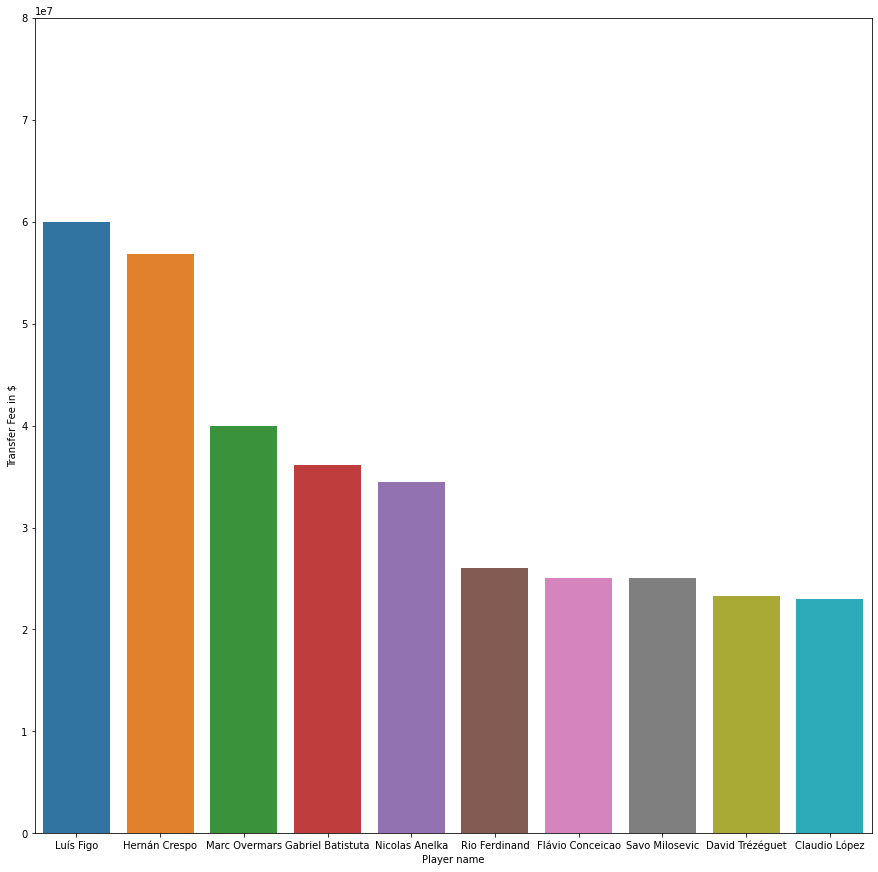

In [8]:
plt.figure(figsize=(15,15))
sns.barplot(x=h_fees.Name,y=h_fees['Transfer_fee'])
plt.ylim(0,80000000)
plt.ylabel('Transfer Fee in $')
plt.xlabel('Player name')

# 10 lowest transfer fees

In [9]:
l_fees = df.tail(10)

Text(0.5, 0, 'Player name')

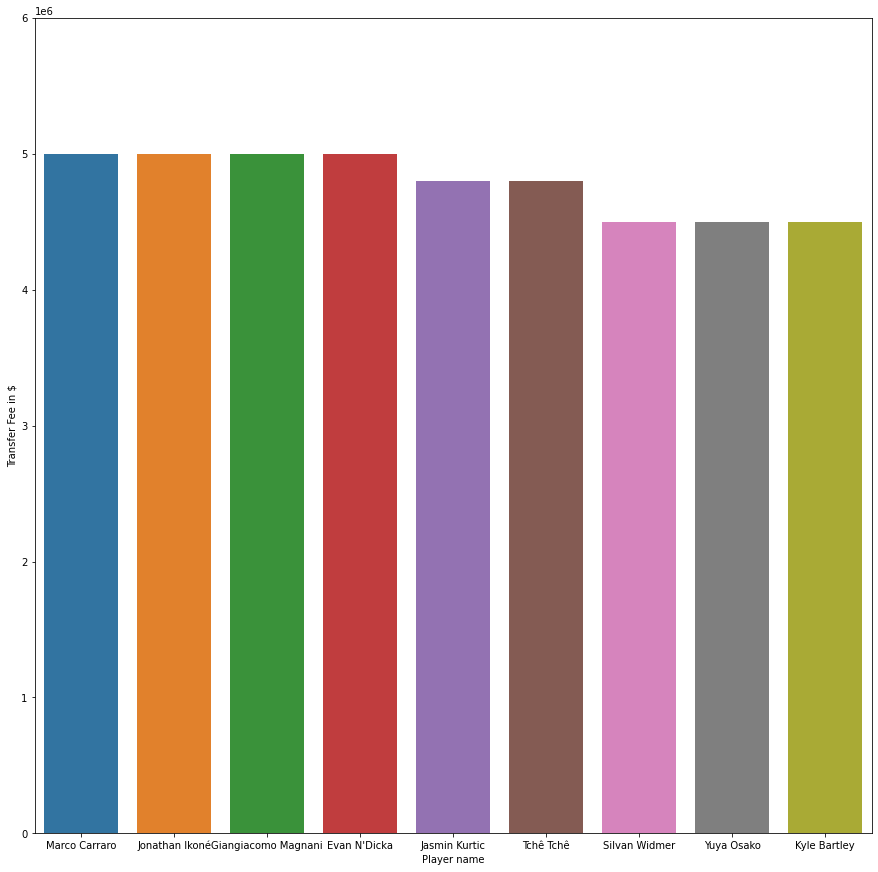

In [10]:
plt.figure(figsize=(15,15))
sns.barplot(x=l_fees.Name,y=l_fees['Transfer_fee'])
plt.ylim(0,6000000)
plt.ylabel('Transfer Fee in $')
plt.xlabel('Player name')

# Which position players got most transferr.

Text(0, 0.5, ' ')

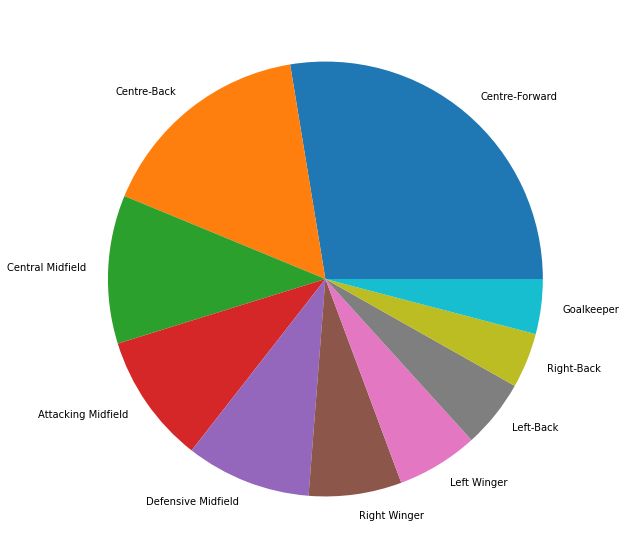

In [11]:
plt.figure(figsize=(10,10))
df['Position'].value_counts().head(10).plot(kind='pie')
plt.ylabel(' ')

# No. of Transfers between leagues



In [12]:
league = df[['League_from','League_to']]

In [13]:
league.head()

,League_from,League_to
0,LaLiga,LaLiga
1,Serie A,Serie A
2,Premier League,LaLiga
3,Serie A,Serie A
4,LaLiga,Ligue 1


In [14]:
lis = []
for i in range(0,len(league)):
  a = league['League_from'][i]
  b = league['League_to'][i]
  s = a+'/'+b
  lis.append(s)

In [ ]:
league['temp'] = lis

In [16]:
league.head(10)

,League_from,League_to,temp
0,LaLiga,LaLiga,LaLiga/LaLiga
1,Serie A,Serie A,Serie A/Serie A
2,Premier League,LaLiga,Premier League/LaLiga
3,Serie A,Serie A,Serie A/Serie A
4,LaLiga,Ligue 1,LaLiga/Ligue 1
5,Premier League,Premier League,Premier League/Premier League
6,LaLiga,LaLiga,LaLiga/LaLiga
7,LaLiga,Serie A,LaLiga/Serie A
8,Ligue 1,Serie A,Ligue 1/Serie A
9,LaLiga,Serie A,LaLiga/Serie A


In [17]:
count = 0
d = {}
for i in range(0,len(league)):
  a = league['temp'][i]
  for j in range(0,len(league)):
    if league['temp'][j] == a:
      count += 1
    else:
      count += 0
  d[a] = count
  count = 0

In [18]:
sorted_d = sorted(d.items(), key=lambda x: x[1],reverse=True)    
print(sorted_d)

[('Premier League/Premier League', 374), ('Serie A/Serie A', 359), ('Ligue 1/Ligue 1', 159), ('Championship/Premier League', 151), ('LaLiga/LaLiga', 147), ('1.Bundesliga/1.Bundesliga', 136), ('Ligue 1/Premier League', 125), ('LaLiga/Premier League', 98), ('Premier Liga/Premier Liga', 76), ('Serie B/Serie A', 74), ('Serie A/Premier League', 73), ('Eredivisie/Premier League', 65), ('Premier League/LaLiga', 62), ('LaLiga/Serie A', 61), ('Eredivisie/Eredivisie', 49), ('1.Bundesliga/Premier League', 48), ('Série A/Premier Liga', 47), ('Ligue 1/LaLiga', 44), ('First Division/Premier League', 42), ('Serie A/LaLiga', 40), ('Liga NOS/LaLiga', 39), ('Süper Lig/Süper Lig', 39), ('Liga NOS/Premier League', 38), ('Super League/Super League', 30), ('2.Bundesliga/1.Bundesliga', 29), ('LaLiga2/LaLiga', 28), ('Ligue 2/Ligue 1', 28), ('Premier League/Serie A', 25), ('Serie A/1.Bundesliga', 25), ('Serie A/Ligue 1', 25), ('Championship/Championship', 25), ('Premier League/Championship', 25), ('Premier Lig

In [19]:
lis = []
lis2 = []
for i in range(0,10):
  lis.append(sorted_d[i][0])
  lis2.append(sorted_d[i][1])

In [20]:
league_transfer = pd.DataFrame()
league_transfer['League-to-League'] = lis
league_transfer['No.-of-Transfers'] = lis2

In [21]:
league_transfer

,League-to-League,No.-of-Transfers
0,Premier League/Premier League,374
1,Serie A/Serie A,359
2,Ligue 1/Ligue 1,159
3,Championship/Premier League,151
4,LaLiga/LaLiga,147
5,1.Bundesliga/1.Bundesliga,136
6,Ligue 1/Premier League,125
7,LaLiga/Premier League,98
8,Premier Liga/Premier Liga,76
9,Serie B/Serie A,74


# Top 10 players with highest market value

In [22]:
h_mv = df[['Name','Market_value']]

In [23]:
a = pd.DataFrame()
a['Value'] = h_mv['Market_value'].sort_values(ascending=False).head(10)

In [24]:
a

,Value
4455,120000000.0
4211,100000000.0
4456,100000000.0
4212,90000000.0
3961,70000000.0
4219,65000000.0
3962,65000000.0
4457,65000000.0
4460,65000000.0
3217,65000000.0


In [25]:
lis2 = []
for i in range(0,len(a)):
  lis2.append(a.iloc[i,0])

In [26]:
lis2

[120000000.0,
 100000000.0,
 100000000.0,
 90000000.0,
 70000000.0,
 65000000.0,
 65000000.0,
 65000000.0,
 65000000.0,
 65000000.0]

In [27]:
index = a['Value'].index
index

Int64Index([4455, 4211, 4456, 4212, 3961, 4219, 3962, 4457, 4460, 3217], dtype='int64')

In [28]:
lis = []
for i in index:
  b = h_mv.iloc[i,0]
  lis.append(b)
lis

['Kylian Mbappé',
 'Neymar',
 'Cristiano Ronaldo',
 'Philippe Coutinho',
 'Paul Pogba',
 'Pierre-Emerick Aubameyang',
 'Gonzalo Higuaín',
 'Thomas Lemar',
 'Naby Keïta',
 'Gareth Bale']

In [29]:
new_h_mv = pd.DataFrame(lis,columns =['Name'])

In [30]:
new_h_mv['Value'] = lis2

In [31]:
new_h_mv

,Name,Value
0,Kylian Mbappé,120000000.0
1,Neymar,100000000.0
2,Cristiano Ronaldo,100000000.0
3,Philippe Coutinho,90000000.0
4,Paul Pogba,70000000.0
5,Pierre-Emerick Aubameyang,65000000.0
6,Gonzalo Higuaín,65000000.0
7,Thomas Lemar,65000000.0
8,Naby Keïta,65000000.0
9,Gareth Bale,65000000.0


# Top 10 players with highest transfer fee

In [32]:
h_tf = df[['Name','Transfer_fee']]
a = pd.DataFrame()
a['Fee'] = h_tf['Transfer_fee'].sort_values(ascending=False).head(10)
lis2 = []
for i in range(0,len(a)):
  lis2.append(a.iloc[i,0])
index = a['Fee'].index
lis = []
for i in index:
  b = h_tf.iloc[i,0]
  lis.append(b)
new_h_tf = pd.DataFrame(lis,columns =['Name'])
new_h_tf['Fee'] = lis2

In [33]:
new_h_tf

,Name,Fee
0,Neymar,222000000
1,Kylian Mbappé,135000000
2,Philippe Coutinho,125000000
3,Cristiano Ronaldo,117000000
4,Ousmane Dembélé,115000000
5,Paul Pogba,105000000
6,Gareth Bale,101000000
7,Cristiano Ronaldo,94000000
8,Gonzalo Higuaín,90000000
9,Neymar,88200000


# Teams that spent the most on transfer

<Figure size 1080x1080 with 0 Axes>

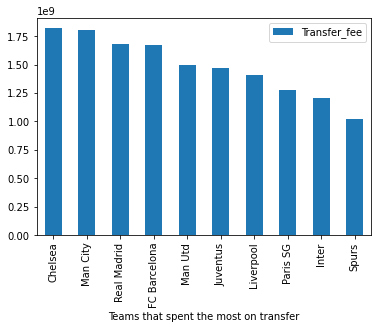

In [53]:
plt.figure(figsize=(15,15))
most_spent = df[['Team_to','Transfer_fee']]
most_spent.groupby('Team_to')[['Transfer_fee']].sum().sort_values(ascending=False,by='Transfer_fee').head(10).plot(kind='bar')
plt.xlabel('Teams that spent the most on transfer')
plt.legend()